In [467]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 10)


## Health personal (total physicians) by province

In [453]:
cwd = os.getcwd()

In [454]:
health_path =  './excel_files/health/'
file= os.listdir(health_path)[-1]
print(file)

Formatted_Distribution of Health Personal by region.xls


In [455]:
xl = pd.ExcelFile( './excel_files/health/'+file)

In [456]:
names = ['provinces','total_physicians','specialist','gp','resident','dentist','nurse','officer','midwife','parmacist']

In [457]:
df_personal = xl.parse(xl.sheet_names[0],usecols=9, skiprows=[1],names=names)

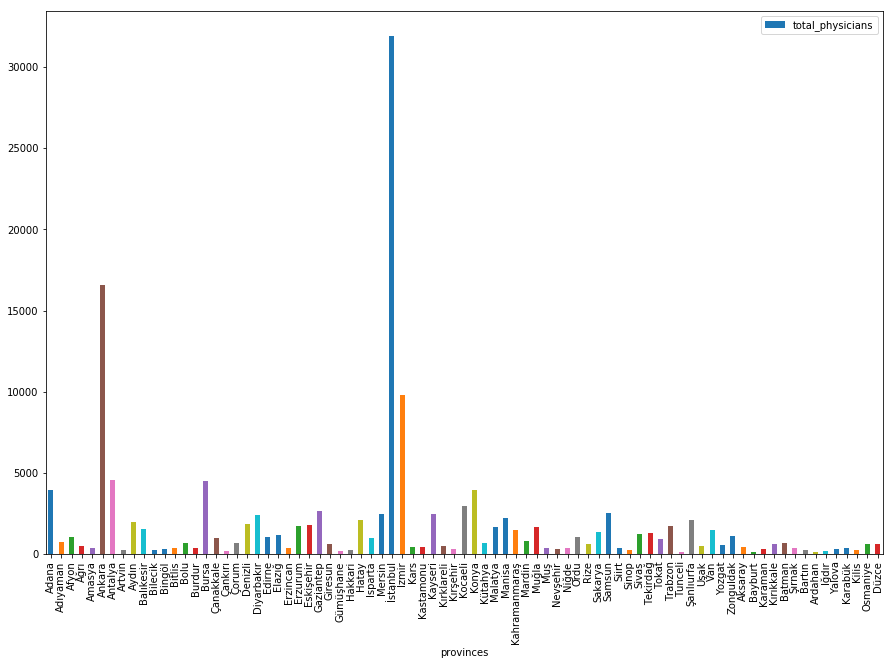

In [469]:
df_personal.plot(kind='bar',x='provinces',y='total_physicians',sort_columns=True)

## Total beds by province

In [470]:
file= os.listdir( health_path)[-2]
print(file)

Formatted_Hospital provision by province.xls


In [471]:
xl = pd.ExcelFile(health_path + file)

In [472]:
names = ['provinces','total_hosps','total_beds','ministry_hops','ministry_beds','uni_hosps','uni_beds','private_hosps','private_beds']

In [473]:
df_beds = xl.parse(xl.sheet_names[0],usecols=13, skiprows=[1,2], names=names)

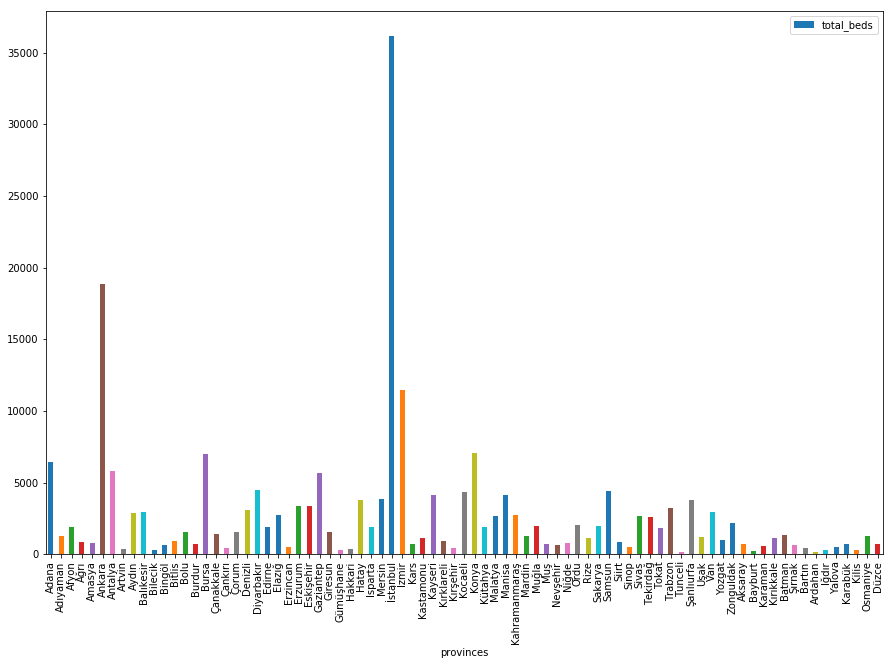

In [474]:
df_beds.plot(kind='bar',x='provinces',y='total_beds',sort_columns=True)

## Rank provinces for their number of beds to number of physicians ratio

In [475]:
df = pd.merge(df_personal, df_beds, on='provinces', how='outer')

In [476]:
print(list(df))

['provinces', 'total_physicians', 'specialist', 'gp', 'resident', 'dentist', 'nurse', 'officer', 'midwife', 'parmacist', 'total_hosps', 'total_beds', 'ministry_hops', 'ministry_beds', 'uni_hosps', 'uni_beds', 'private_hosps', 'private_beds']


Ratio of beds and personal: provinces with a ratio lower than one standard deviation could be categorised as bad, those with more than one standard deviation as good and the rest as intermidiate (therefore get a 2/3, 1/3, 1/3 split)

In [477]:
ratio = df['total_beds'].div(df['total_physicians'])

In [478]:
mean = ratio.mean()
std = ratio.std()

print (mean)
print (std)


1.7684620214401272
0.34037975855020386


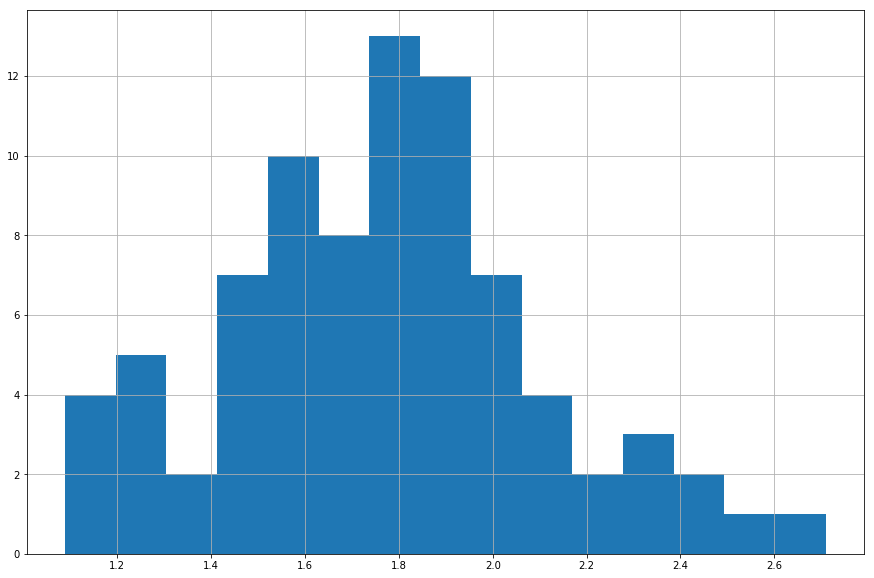

In [479]:
ratio.hist(bins=15)

In [480]:
print(ratio[1])

1.7033557046979866


Since the distribution is not exactly gaussian and is skewed:

In [481]:
good = ratio.loc[ratio > (mean + std)]
inter = ratio.loc[(ratio < (mean + std)) & ratio.loc[ratio > (mean - std)]]
bad = ratio.loc[ratio < (mean - std)]
print('Percentage of cities ranked as good %.2f'%(100*len(good.index.values)/len(df.index.values)))
print('Percentage of cities ranked as intermidiate %.2f'%(100*len(inter.index.values)/len(df.index.values)))
print('Percentage of cities ranked as bad %.2f'%(100*len(bad.index.values)/len(df.index.values)))

Percentage of cities ranked as good 14.81
Percentage of cities ranked as intermidiate 69.14
Percentage of cities ranked as bad 16.05


In [482]:
print('RANKING PROVINCES FOR THEIR BED TO PHYSICIAN RATIO')
print('--------- Bad provinces -------------')
bad_bed_phys_ratio = df['provinces'].loc[bad.index.values]
print(bad_bed_phys_ratio)
print('--------- Good provinces -------------')
good_bed_phys_ratio=df['provinces'].loc[good.index.values]
print(good_bed_phys_ratio)


RANKING PROVINCES FOR THEIR BED TO PHYSICIAN RATIO
--------- Bad provinces -------------
5        Ankara
6       Antalya
10      Bilecik
16    Çanakkale
23     Erzincan
33     İstanbul
34        İzmir
39     Kırşehir
47        Muğla
61      Tunceli
74      Ardahan
78        Kilis
80        Düzce
Name: provinces, dtype: object
--------- Good provinces -------------
11       Bingöl
12       Bitlis
13         Bolu
18        Çorum
22       Elazığ
26    Gaziantep
27      Giresun
36    Kastamonu
42      Kütahya
50        Niğde
57        Sivas
63         Uşak
Name: provinces, dtype: object


## Rank provinces by their number of physician per capita ratio

In [484]:
population_path = './excel_files/population/'
file= os.listdir(population_path)[0]
print(file)

Formatted_population_provinces.xls


In [485]:
strs = [str(i) for i in range(2000,2018)]

In [486]:
names = ['provinces']
names = names + strs

In [490]:
xl = pd.ExcelFile(population_path + file)
df_pops = xl.parse(xl.sheet_names[0],usecols=18,names=names,skiprows=[2])

In [491]:
# Number of physicians / total population
ratio_physicians = df['total_physicians'].div(df_pops['2016'])*1000

In [492]:
mean_phys = ratio_physicians.mean()
std_phys = ratio_physicians.std()

print (mean_phys)
print (std_phys)


1.5610015056129654
0.4406256863135811


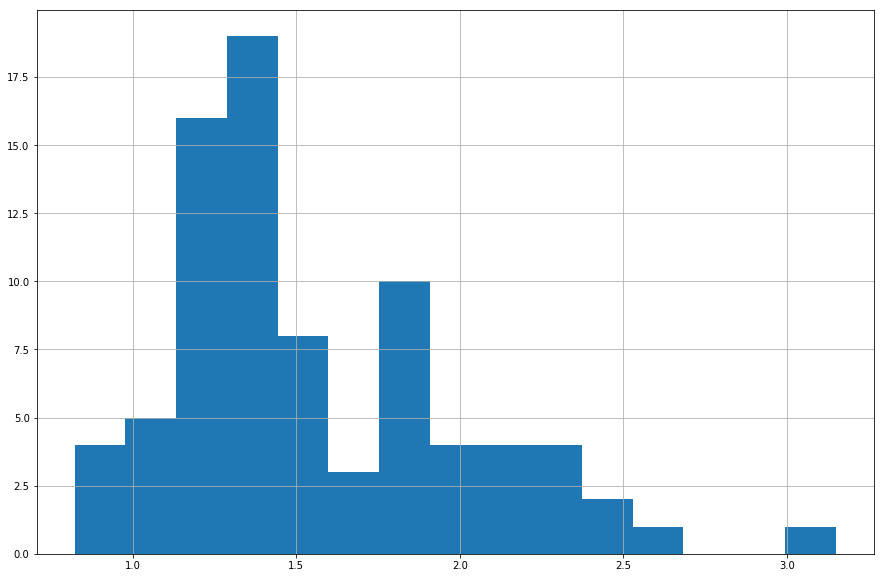

In [493]:
ratio_physicians.hist(bins=15)

In [494]:
good_phys = ratio_physicians.loc[ratio_physicians > (mean_phys + std_phys)]
inter_phys = ratio_physicians.loc[(ratio_physicians < (mean_phys + std_phys)) & ratio_physicians.loc[ratio_physicians > (mean_phys- std_phys)]]
bad_phys = ratio_physicians.loc[ratio_physicians < (mean_phys - std_phys)]
print('Percentage of cities ranked as good %.2f'%(100*len(good_phys.index.values)/len(df.index.values)))
print('Percentage of cities ranked as intermidiate %.2f'%(100*len(inter_phys.index.values)/len(df.index.values)))
print('Percentage of cities ranked as bad %.2f'%(100*len(bad_phys.index.values)/len(df.index.values)))

Percentage of cities ranked as good 16.05
Percentage of cities ranked as intermidiate 72.84
Percentage of cities ranked as bad 11.11


In [495]:
print('RANKING PROVINCES FOR THEIR PHYSICIAN TO CITIZEN RATIO')
print('--------- Bad provinces -------------')
bad_phys_ratio = df['provinces'].loc[bad_phys.index.values]
print(bad_phys_ratio)
print('--------- Good provinces -------------')
good_phys_ratio = df['provinces'].loc[good_phys.index.values]
print(good_phys_ratio)


RANKING PROVINCES FOR THEIR PHYSICIAN TO CITIZEN RATIO
--------- Bad provinces -------------
3          Ağrı
11       Bingöl
29      Hakkari
46       Mardin
48          Muş
50        Niğde
62    Şanlıurfa
72       Şırnak
75        Iğdır
Name: provinces, dtype: object
--------- Good provinces -------------
5        Ankara
6       Antalya
13         Bolu
21       Edirne
22       Elazığ
24      Erzurum
25    Eskişehir
31      Isparta
33     İstanbul
34        İzmir
43      Malatya
60      Trabzon
70    Kırıkkale
Name: provinces, dtype: object


In [496]:
pd.Series(good_bed_phys_ratio).isin(good_phys_ratio)

11    False
12    False
13     True
18    False
22     True
26    False
27    False
36    False
42    False
50    False
57    False
63    False
Name: provinces, dtype: bool

In [497]:
pd.Series(bad_bed_phys_ratio).isin(bad_phys_ratio)

5     False
6     False
10    False
16    False
23    False
33    False
34    False
39    False
47    False
61    False
74    False
78    False
80    False
Name: provinces, dtype: bool

## Problem : both ratios are inconsistent !! -> Not so simple... Even some ranked as bad appear ranked as good

In [498]:
pd.Series(bad_bed_phys_ratio).isin(good_phys_ratio)

5      True
6      True
10    False
16    False
23    False
33     True
34     True
39    False
47    False
61    False
74    False
78    False
80    False
Name: provinces, dtype: bool

## Perform PCA analysis in all hospitall information to reduce dimensionality

Merge datasets with population per city

In [499]:
df_total = pd.concat([df, df_pops['2016'].to_frame()],axis=1)

In [500]:
features = list(df_total)[1:]

x = df_total[features].values

# Standarise features
x = StandardScaler().fit_transform(x)

/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [501]:
print('Trying to reduce the %d highly correlated freatures into 2 non-correlated ones'%len(features))

Trying to reduce the 18 highly correlated freatures into 2 non-correlated ones


In [502]:
pca = PCA(n_components=2)

In [503]:
principalcomponents = pca.fit_transform(x)

In [504]:
principalDf = pd.DataFrame(data = principalcomponents
             , columns = ['PC 1', 'PC 2'])

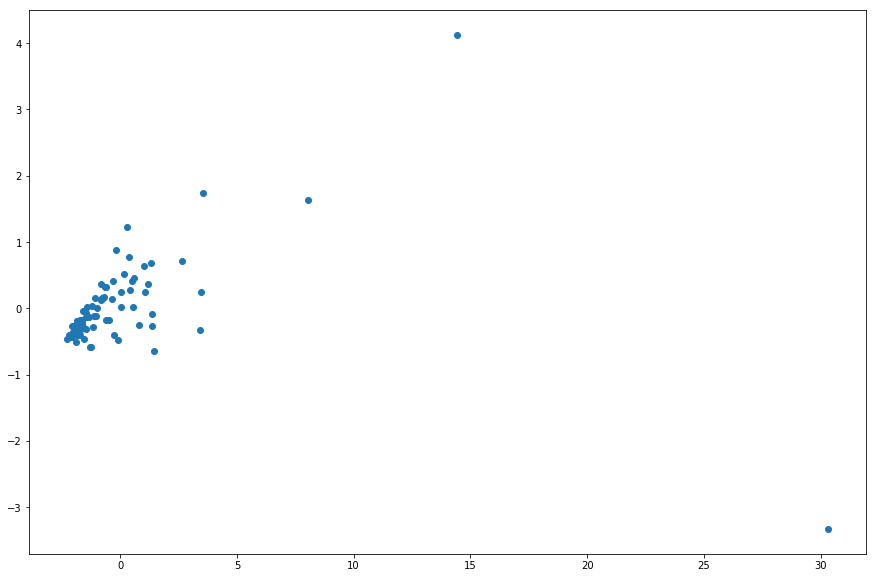

In [505]:
plt.scatter(principalDf['PC 1'], principalDf['PC 2'])

In [506]:
pca.explained_variance_ratio_ 
# As it seems, most of the information (the 18 features) is contained in this one component

array([0.94210633, 0.03072234])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6784bd5c88>]],
      dtype=object)

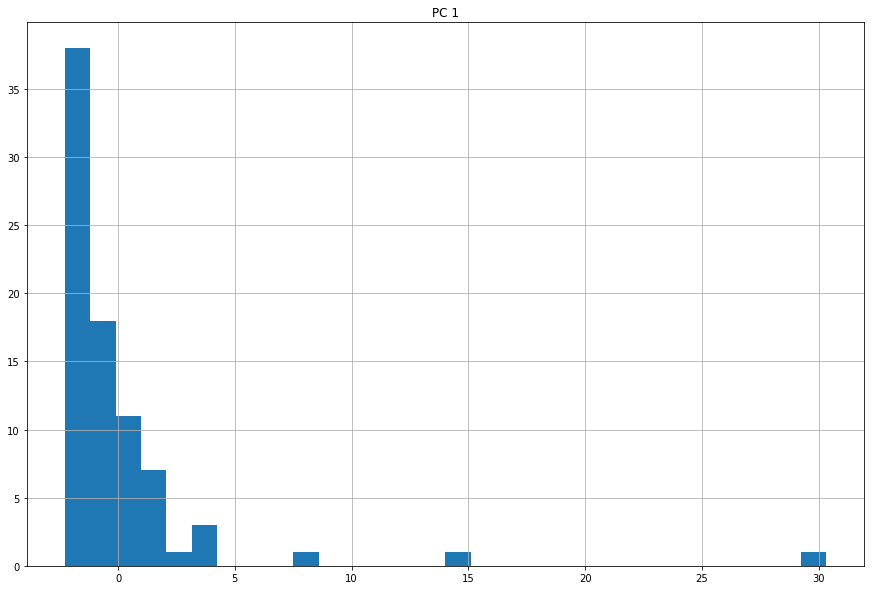

In [507]:
principalDf.hist(column='PC 1',bins=30)

# Future analysis:
    i) Should include more datasets such as death causes
    ii) Review PCA and find optimum dimensionality (is the variance ratio a true measure?)